<a href="https://colab.research.google.com/github/digantkumar/Digant-Kumar/blob/master/Task%203%20-%20Reconstructing%20Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 3 - TEXT RECONSTRUCTION APPLICATION**

### **Importing the required libraries**

In [0]:

import os
from pathlib import Path
import glob
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
np.random.seed(111)

In [0]:
# Creating the root mean square function
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))
        

### **DENSE, MULTI LAYER MODEL**

In [106]:
def build_autoencoder():
    input_img = tf.keras.layers.Input(shape=(226800))
    
    # Encoder
    hidden_layer_1 = tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)(input_img)
    hidden_layer_2 = tf.keras.layers.Dense(units = 64, activation = tf.nn.relu)(hidden_layer_1)
    hidden_layer_3 = tf.keras.layers.Dense(units = 32, activation = tf.nn.relu)(hidden_layer_2)
    encoder = tf.keras.layers.Dense(units = 32, activation = tf.nn.relu)(hidden_layer_3)
    
    # Decoder
    hid_layer_1 = tf.keras.layers.Dense(units = 64, activation = tf.nn.relu)(encoder)
    hid_layer_2 = tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)(hid_layer_1)
    decoder = tf.keras.layers.Dense(units = 226800, activation = tf.nn.relu)(hid_layer_2)

    #model
    autoencoder = tf.keras.models.Model(inputs=input_img, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()

Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 226800)]          0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               29030528  
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_47 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_48 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_49 (Dense)             (None, 128)               832

In [107]:
train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

X = np.reshape(X, (X.shape[0], 226800))
Y = np.reshape(Y, (Y.shape[0], 226800))
test_img_load = np.reshape(test_img_load, (test_img_load.shape[0], 226800))

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(72, 226800)
(144, 226800)
(144, 226800)
Total number of training samples:  (129, 226800)
Total number of validation samples:  (15, 226800)
Epoch 1/100
17/17 [==============================] - 1s 35ms/step - loss: 0.5655 - val_loss: 0.4686
Epoch 2/100
17/17 [==============================] - 1s 30ms/step - loss: 0.4571 - val_loss: 0.4490
Epoch 3/100
17/17 [==============================] - 1s 30ms/step - loss: 0.4472 - val_loss: 0.4454
Epoch 4/100
17/17 [==============================] - 1s 31ms/step - loss: 0.4460 - val_loss: 0.4454
Epoch 5/100
17/17 [==============================] - 1s 30ms/step - loss: 0.4432 - val_loss: 0.4408
Epoch 6/100
17/17 [==============================] - 1s 31ms/step - loss: 0.4379 - val_loss: 0.4308
Epoch 7/100
17/17 [==============================] - 1s 31ms/step - loss: 0.4279 - val_loss: 0.4245
Epoch 8/100
17/17 [==============================] - 1s 31ms/step - loss: 0.4209 - val_loss: 0.4156
Epoch 9/100
17/17 [==============================] - 1s 31ms

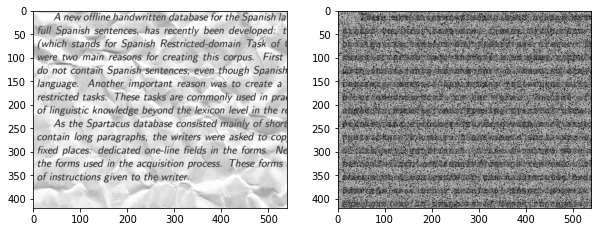

In [125]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(test_img_load[1].reshape(420,540) , cmap='gray')
ax[1].imshow(predicted_label[1].reshape(420,540), cmap='gray')
plt.show()

### **CNN BASIC MODEL**

In [0]:
def build_autoencoder():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1))

  # Encoder
  x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

  # Decoder
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # Model
  autoencoder = tf.keras.models.Model(input_img, decoded)
  autoencoder.compile(optimizer='adadelta', loss="binary_crossentropy")
  return autoencoder

autoencoder = build_autoencoder()


In [82]:
train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
17/17 [==============================] - 1s 66ms/step - loss: 0.6861 - val_loss: 0.6858
Epoch 2/100
17/17 [==============================] - 1s 66ms/step - loss: 0.6859 - val_loss: 0.6857
Epoch 3/100
17/17 [==============================] - 1s 66ms/step - loss: 0.6857 - val_loss: 0.6855
Epoch 4/100
17/17 [==============================] - 1s 65ms/step - loss: 0.6855 - val_loss: 0.6853
Epoch 5/100
17/17 [==============================] - 1s 66ms/step - loss: 0.6853 - val_loss: 0.6851
Epoch 6/100
17/17 [==============================] - 1s 64ms/step - loss: 0.6852 - val_loss: 0.6849
Epoch 7/100
17/17 [==============================] - 1s 65ms/step - loss: 0.6849 - val_loss: 0.6847
Epoch 8/100
17/17 [==============================] - 1s 65ms/step - loss: 0.6847 - val_loss: 0.6845
Epoch 9/100
17/17 [==============================] - 1s 65ms/step - loss: 0.6846 - val_loss

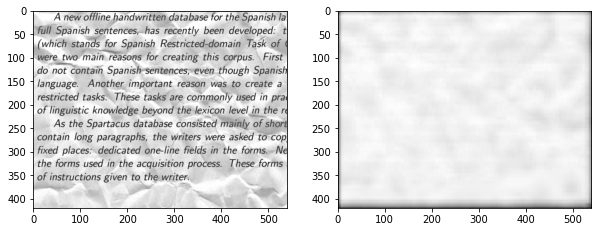

In [84]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_img_load[1]), cmap='gray')
ax[1].imshow(predicted_label[1], cmap='gray')
plt.show()

### **CNN COMPLEX MODEL 1**

In [135]:

#################################################################################################
#########                        CNN COMPLEX MODEL 1                                     ########
#################################################################################################

def build_autoencoder():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1))

  # Encoder
  x = tf.keras.layers.Conv2D(16, (4, 4), activation='relu', padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dense(units = 16, activation='relu')(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  

  # Decoder
  x = tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Dense(units = 16, activation='relu')(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # Model
  autoencoder = tf.keras.models.Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss="mse")
  return autoencoder

autoencoder = build_autoencoder()

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_242 (Conv2D)          (None, 420, 540, 16)      272       
_________________________________________________________________
batch_normalization_70 (Batc (None, 420, 540, 16)      64        
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 210, 270, 16)      0         
_________________________________________________________________
conv2d_243 (Conv2D)          (None, 210, 270, 8)       2056      
_________________________________________________________________
batch_normalization_71 (Batc (None, 210, 270, 8)       32        
_________________________________________________________________
conv2d_244 (Conv2D)          (None, 210, 270, 8)       103

In [136]:
train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
17/17 [==============================] - 2s 129ms/step - loss: 0.1656 - val_loss: 0.1457
Epoch 2/100
17/17 [==============================] - 2s 103ms/step - loss: 0.0745 - val_loss: 0.0877
Epoch 3/100
17/17 [==============================] - 2s 104ms/step - loss: 0.0643 - val_loss: 0.0781
Epoch 4/100
17/17 [==============================] - 2s 103ms/step - loss: 0.0596 - val_loss: 0.0748
Epoch 5/100
17/17 [==============================] - 2s 103ms/step - loss: 0.0570 - val_loss: 0.0710
Epoch 6/100
17/17 [==============================] - 2s 104ms/step - loss: 0.0549 - val_loss: 0.0669
Epoch 7/100
17/17 [==============================] - 2s 104ms/step - loss: 0.0533 - val_loss: 0.0654
Epoch 8/100
17/17 [==============================] - 2s 104ms/step - loss: 0.0533 - val_loss: 0.0646
Epoch 9/100
17/17 [==============================] - 2s 104ms/step - loss: 0.0525 -

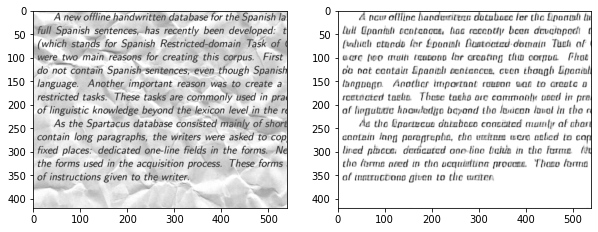

In [137]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_img_load[1]), cmap='gray')
ax[1].imshow(predicted_label[1], cmap='gray')
plt.show()

### **CNN COMPLEX MODEL 2**

In [128]:
#################################################################################################
#########                        CNN COMPLEX MODEL 2                                     ########
#################################################################################################

def build_autoencoder():
  input_img = tf.keras.layers.Input(shape=(420, 540, 1))

  # Encoder
  x = tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same')(input_img)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
  #x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dense(units = 16, activation='relu')(x)
  encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  

  # Decoder
  x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(encoded)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
  #x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.UpSampling2D((2, 2))(x)
  x = tf.keras.layers.Dense(units = 16, activation='relu')(x)
  decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

  # Model
  autoencoder = tf.keras.models.Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss="mse")
  return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()


Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 420, 540, 16)      416       
_________________________________________________________________
batch_normalization_52 (Batc (None, 420, 540, 16)      64        
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 210, 270, 16)      0         
_________________________________________________________________
conv2d_220 (Conv2D)          (None, 210, 270, 8)       3208      
_________________________________________________________________
batch_normalization_53 (Batc (None, 210, 270, 8)       32        
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 210, 270, 8)       160

In [129]:
train_images = glob.glob("Train/*.png")
train_labels = glob.glob("Train_cleaned/*.png")
test_images = glob.glob("Test/*.png")
X = []
Y = []
test_img_load = []

for img in train_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_images:
    img = load_img(img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    test_img_load.append(img)

X = np.array(X)
Y = np.array(Y)
test_img_load = np.array(test_img_load)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

# Train your model
autoencoder.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)
Epoch 1/100
17/17 [==============================] - 3s 149ms/step - loss: 0.0979 - val_loss: 0.1599
Epoch 2/100
17/17 [==============================] - 2s 138ms/step - loss: 0.0521 - val_loss: 0.0901
Epoch 3/100
17/17 [==============================] - 2s 139ms/step - loss: 0.0453 - val_loss: 0.0672
Epoch 4/100
17/17 [==============================] - 2s 139ms/step - loss: 0.0412 - val_loss: 0.0648
Epoch 5/100
17/17 [==============================] - 2s 138ms/step - loss: 0.0371 - val_loss: 0.0756
Epoch 6/100
17/17 [==============================] - 2s 139ms/step - loss: 0.0333 - val_loss: 0.0763
Epoch 7/100
17/17 [==============================] - 2s 139ms/step - loss: 0.0299 - val_loss: 0.0618
Epoch 8/100
17/17 [==============================] - 2s 138ms/step - loss: 0.0273 - val_loss: 0.0609
Epoch 9/100
17/17 [==============================] - 2s 137ms/step - loss: 0.0255 -

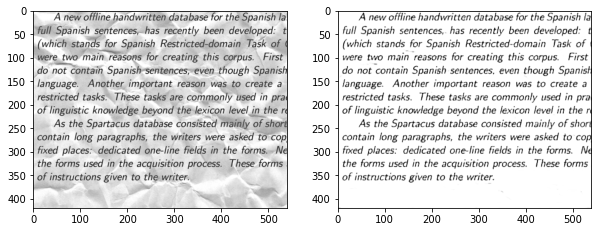

In [130]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder.predict(test_img_load))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(test_img_load[1]), cmap='gray')
ax[1].imshow(predicted_label[1], cmap='gray')
plt.show()